<a href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/FCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# 模式识别·第七次作业·模糊聚类（Fussy C Means）

#### 纪泽西 17375338

#### Last Modified:26th,April,2020

</center>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/FCM.ipynb"> 
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" /><br>Run in Google Colab</a></td>
</table>


## Part1: 导入库文件及数据集

#### 如需在其他环境运行需改变数据集所在路径

In [3]:
 !pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 157kB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=e15ba9b4e39e9dfbc5cce9735fa101b6c76bdf502ba8a21f3e5e56915783fc82
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [6]:
%tensorflow_version 2.x
import tensorflow as tf
import sklearn
from sklearn.metrics import confusion_matrix
from skfuzzy.cluster import cmeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from time import *

import os
import scipy.io as sio

%cd /content/drive/My Drive/Pattern Recognition/Dataset/cell_dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/content/drive/My Drive/Pattern Recognition/Dataset/cell_dataset


In [0]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [8]:
print(x_train.shape,x_test.shape)
print(np.unique(y_test))
print(np.bincount(y_test.astype(int)))

(14536, 51, 51) (6229, 51, 51)
[0. 1. 2.]
[ 683 2439 3107]


## Part2:数据预处理

In [22]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.shape,x_test.shape)

(14536, 2601) (6229, 2601)


## Part3:模型建立


由于skfuzzy模块内提到对于高维特征数据，cmeans聚类可能存在问题，故使用[第五次作业：细胞聚类](https://colab.research.google.com/github/Phantom-Ren/PR_TH/blob/master/细胞聚类.ipynb)中使用的AutoEncoder进行特征降维。

In [0]:
encoding_dim = 10

In [0]:
encoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,activation='relu') ,                                   
  tf.keras.layers.Dense(32,activation='relu') ,
  tf.keras.layers.Dense(8,activation='relu') ,
  tf.keras.layers.Dense(encoding_dim) 
])

decoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8,activation='relu') ,                                   
  tf.keras.layers.Dense(32,activation='relu') ,
  tf.keras.layers.Dense(128,activation='relu') ,
  tf.keras.layers.Dense(2601,activation='sigmoid') 
])

AE = tf.keras.models.Sequential([
  encoder,                               
  decoder
])

In [0]:
AE.compile(optimizer='adam',loss='binary_crossentropy')

In [26]:
AE.fit(x_train,x_train,epochs=10,batch_size=256)

Epoch 1/10
57/57 [==============================] - 2s 37ms/step - loss: 0.2308
Epoch 2/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0672
Epoch 3/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0623
Epoch 4/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0592
Epoch 5/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0581
Epoch 6/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0577
Epoch 7/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0576
Epoch 8/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0574
Epoch 9/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0573
Epoch 10/10
57/57 [==============================] - 2s 37ms/step - loss: 0.0572


In [0]:
x_encoded = encoder.predict(x_train)
x_encoded_test = encoder.predict(x_test)

In [30]:
x_encoded_t = x_encoded.T
print(x_encoded_t.shape)

(10, 14536)


In [41]:
st=time()
center, u, u0, d, jm, p, fpc = cmeans(x_encoded_t, m=2, c=8, error=0.0005, maxiter=1000)
et=time()
print('Time Usage:',et-st,'s')
print('Numbers of iterations used:',p)
for i in u:
  yhat = np.argmax(u, axis=0)

Time Usage: 9.911698341369629 s
Numbers of iterations used: 410


In [50]:
print(center)
print(center.shape)

[[ -3.44933402  -8.44556914 -16.94252588  -8.74556024 -12.61217008
   -9.7781175   18.60453291   2.95457345   3.22953149   5.69484494]
 [-11.97403419 -16.07650986 -26.56396647 -16.34790619 -21.81834829
  -15.61480001  34.48161701   8.90122248  11.26525733  12.4596491 ]
 [ -7.22867202 -12.76481299 -23.26152398 -12.80788411 -18.18223393
  -13.88773779  27.39076737   5.79463356   6.88977848   9.47686693]
 [ -0.72018174  -3.36455579  -8.15082003  -4.31916584  -5.82211945
   -4.75698858   9.04330793   1.32119156   0.68767281   2.14246547]
 [-23.36955657 -21.53172434 -25.71895429 -23.30417817 -25.17116461
  -11.51322674  46.47580771  14.77245746  22.20161965  14.57876323]
 [-29.09174015 -26.21911058 -19.85356267 -29.59542209 -25.20324848
   -3.53020116  53.2928569   16.38369228  28.97699993  11.33743856]
 [-24.79542182 -22.26765841 -15.34363889 -25.22701977 -20.6935394
   -1.61246474  44.78221591  13.69816692  24.88078417   8.79516102]
 [-17.60714073 -18.62241444 -27.38277968 -19.41323712 -2

In [0]:
from sklearn.metrics import fowlkes_mallows_score
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    acc = accuracy_score(ytest, yhat)
    score_f=fowlkes_mallows_score(ytest,yhat)
    print(f"Sum Axis-1 as Classification accuracy: {acc}")
    print('F-Score:',score_f)

Sum Axis-1 as Classification accuracy: 0.19888552559163455
F-Score: 0.3129005083679034


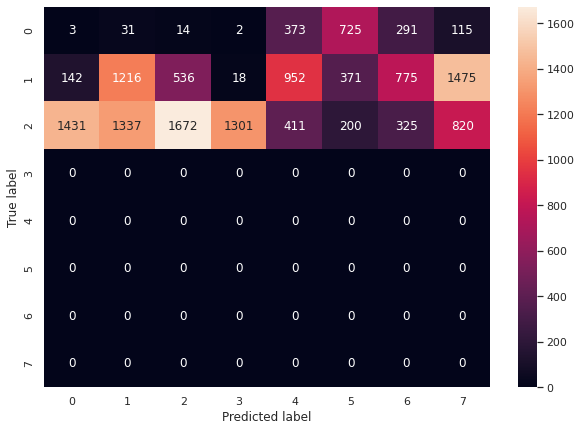

In [47]:
draw_confusionmatrix(y_train,yhat)

Sum Axis-1 as Classification accuracy: 0.6651073197578427
F-Score: 0.5610603391756352


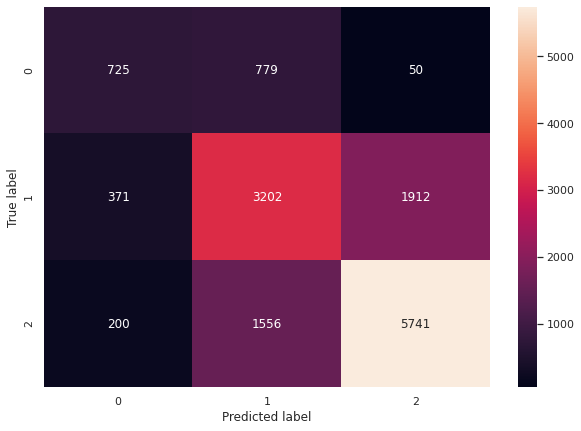

In [48]:
temp=[2,2,2,2,1,0,1,1]
y_hat1=np.zeros(14536)
for i in range(0,14536):
  y_hat1[i] = temp[yhat[i]]
draw_confusionmatrix(y_train,y_hat1)  

将结果与Kmeans聚类相比，发现结果有较大提升（61%->67%）。但相对有监督学习方法，结果仍不尽如人意。